# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='./Reacher_Windows_x86_64/Reacher.exe')
#this is the one agent reacher

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 1
Size of each action: 4
There are 1 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
rand_scores = []
for episode in range(10):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) episode {}: {}'.format(episode,np.mean(scores)))
    rand_scores.append(np.mean(scores))

Total score (averaged over agents) episode 0: 0.0
Total score (averaged over agents) episode 1: 0.0
Total score (averaged over agents) episode 2: 0.3199999928474426
Total score (averaged over agents) episode 3: 0.0
Total score (averaged over agents) episode 4: 0.3899999912828207
Total score (averaged over agents) episode 5: 0.2199999950826168
Total score (averaged over agents) episode 6: 0.0
Total score (averaged over agents) episode 7: 0.0
Total score (averaged over agents) episode 8: 0.20999999530613422
Total score (averaged over agents) episode 9: 0.0


In [6]:
rand_mean = np.mean(rand_scores)
rand_std  = np.std(rand_scores)
print('Taking random actions for 10 episodes gives mean score of %s, with standard deviation %s'%(rand_mean,rand_std))

Taking random actions for 10 episodes gives mean score of 0.11399999745190144, with standard deviation 0.14732277159270254


When finished, you can close the environment.

In [7]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from collections import deque, namedtuple
import copy
import random
from datetime import datetime
import pickle

Some code in this section is based on examples found in this blog post https://towardsdatascience.com/deep-deterministic-policy-gradients-explained-2d94655a9b7b

In [9]:
class actor_network(nn.Module):
    def __init__(self, state_size, hidden1_size, hidden2_size, action_size):
        super(actor_network, self).__init__()
        self.fc1 = nn.Linear(state_size,hidden1_size)
        self.fc2 = nn.Linear(hidden1_size,hidden2_size)
        self.fc3 = nn.Linear(hidden2_size,action_size)
        
    def forward(self,state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        x = F.tanh(self.fc3(x))
        return(x)

class critic_network(nn.Module):
    def __init__(self, state_size, hidden1_size, hidden2_size, action_size):
        super(critic_network, self).__init__()
        self.fc1 = nn.Linear(state_size+action_size,hidden1_size)
        self.fc2 = nn.Linear(hidden1_size,hidden2_size)
        self.fc3 = nn.Linear(hidden2_size,action_size)
        
    def forward(self,state,action):
        x = torch.cat((state,action),dim=1) 
        #here the action has been included from the 1st layer, unlike DDPG paper which adds it in at 2nd.
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return(x)


In [10]:
class replay_buffer():
    def __init__(self,max_size,batch_size):
        self.memory = deque(maxlen=int(max_size))
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

    
    def add(self,state,action,reward,next_state,done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
        #memory 1st index is length, 2nd index is 0:state, 1:action, 2:reward, 3:next_state, 4:done
        
    def sample(self):
        experiences = random.sample(self.memory,k=self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float()
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float()
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float()
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float()
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float()
        
        return(states,actions,rewards,next_states,dones)
    
    def __len__(self):
        return(len(self.memory))
    

In [11]:
class OU_Noise():
    #Generate Ornstein-Uhlenbeck Noise
    #mu = 0, sigma constant
    def __init__(self,action_size,action_min,action_max,theta,sigma):
        self.action_size = action_size
        self.theta = theta
        self.sigma = sigma
        self.action_min, self.action_max = action_min, action_max
        self.reset()
    def reset(self):
        self.x = np.zeros(action_size)
    def get_noise(self,action):
        dx = -self.theta * self.x + self.sigma * np.random.randn(self.action_size)
        self.x = self.x+dx
        new_action = np.clip(action + self.x, self.action_min, self.action_max)
        return new_action
    

In [12]:
class Agent():
    def __init__(self):
        self.critic_local = critic_network(state_size,HIDDEN_SIZE,HIDDEN_SIZE,action_size)
        self.critic_target = copy.deepcopy(self.critic_local)
        self.actor_local = actor_network(state_size,HIDDEN_SIZE,HIDDEN_SIZE,action_size)
        self.actor_target = copy.deepcopy(self.actor_local)

        self.replay_memory = replay_buffer(MAX_REPLAY_SIZE,BATCH_SIZE)
        
        self.actor_optim = optim.Adam(self.actor_local.parameters(), lr=ACTOR_LR)
        self.critic_optim = optim.Adam(self.critic_local.parameters(), lr=CRITIC_LR)
    
    def get_actions(self,states):
        s = torch.from_numpy(states).float()
        a = self.actor_local(s).detach().numpy()
        return(a)
    
    def step(self,states,actions,rewards,next_states,dones):
        #add experience to memory
        self.replay_memory.add(states,actions,rewards,next_states,dones)
        
        #If enough memory, take a random sample from the memory, and learn from it
        if len(self.replay_memory) >= BATCH_SIZE:
            experience_batch = self.replay_memory.sample()
            self.learn(experience_batch)
            
    def learn(self,experience_batch):
        states,actions,rewards,next_states,dones = experience_batch
        
        states = torch.FloatTensor(states)
        actions = torch.FloatTensor(actions)
        rewards = torch.FloatTensor(rewards)
        next_stated = torch.FloatTensor(next_states)
        dones = torch.FloatTensor(dones)
        
        Q_vals = self.critic_local(state=states,action=actions)
        next_actions = self.actor_target(next_states)
        next_Q = self.critic_target(next_states,next_actions)
        Q_target = rewards + GAMMA * next_Q
        
        #update local critic network
        critic_loss = F.mse_loss(Q_vals, Q_target)
        self.critic_optim.zero_grad()
        critic_loss.backward()
        self.critic_optim.step()
        
        #update local actor network
        actor_loss = -self.critic_local(states, self.actor_local.forward(states)).mean()
        self.actor_optim.zero_grad()
        actor_loss.backward()
        self.actor_optim.step()
        
        #update target networks
        self.actor_target = self.soft_update(self.actor_local, self.actor_target)
        self.critic_target = self.soft_update(self.critic_local, self.critic_target)
        
    def soft_update(self,local,target):
        for name, param in target.state_dict().items():
            l, t = local.state_dict()[name], target.state_dict()[name] #local,target
            new = l * TAU + t * (1.0-TAU)
            target.state_dict()[name].copy_(new)
        return(target)
        

In [14]:
HIDDEN_SIZE = 300
MAX_REPLAY_SIZE = 1e6
BATCH_SIZE = 32

GAMMA=0.99
ACTOR_LR = 1e-4
CRITIC_LR = 1e-3
TAU = 1e-3

#Ornstein-Uhlenbeck Noise
OU_theta = 0.15
OU_sigma = 0.2

Num_episodes = 500

#Save frequency and filenames for checkpoints
SAVE_EVERY = 20
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
checkpoint_pth = './checkpoints/'
def save_checkpoints(agent,number,scores,time=timestamp,pth=checkpoint_pth):
    torch.save(agent.critic_local.state_dict(),pth+time+'_critic_'+number+'.pth')
    torch.save(agent.actor_local.state_dict(),pth+time+'_actor_'+number+'.pth')
    with open(pth+time+'_scores_'+number+'.pkl', 'wb') as f:
        pickle.dump(scores,f)

In [15]:
agent = Agent()
noise = OU_Noise(action_size,-1,+1,OU_theta,OU_sigma)

In [16]:
import math
def timedelta_to_str(d):
    '''function to format a timedelta string nicely'''
    s = d.seconds
    h = math.floor(s/3600)
    m = math.floor((s-h*3600)/60)
    return('%sh %sm'%(h,m))

In [17]:
scores_history = []

start_time = datetime.now()

for episode in range(Num_episodes):
    noise.reset()
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)
    while True:
        actions = agent.get_actions(states)
        actions = noise.get_noise(actions) #This adds noise to actions and also clips values between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to the environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        
        agent.step(states,actions,rewards,next_states,dones)    
        
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    scores_history.append(scores)
    
    now_time = datetime.now()
    run_time = now_time-start_time
    forecast_time = (run_time / (episode + 1)) * (Num_episodes - episode - 1)
    
    print('episode = %s, score = %s, running for: %s, time to go: %s'%(episode+1,scores,
                                                                    timedelta_to_str(run_time),
                                                                    timedelta_to_str(forecast_time)))
    if (episode%SAVE_EVERY) == 0 and episode!=0 :
        save_checkpoints(agent,str(episode),scores_history)

save_checkpoints(agent,'Final',scores_history)
print('Complete')

episode = 1, score = [1.30999997], running for: 0h 1m, time to go: 11h 13m
episode = 2, score = [1.24999997], running for: 0h 2m, time to go: 11h 15m
episode = 3, score = [0.91999998], running for: 0h 4m, time to go: 11h 15m
episode = 4, score = [2.21999995], running for: 0h 5m, time to go: 11h 16m
episode = 5, score = [0.55999999], running for: 0h 6m, time to go: 11h 17m
episode = 6, score = [2.20999995], running for: 0h 8m, time to go: 11h 42m
episode = 7, score = [1.18999997], running for: 0h 10m, time to go: 11h 46m
episode = 8, score = [0.81999998], running for: 0h 11m, time to go: 11h 42m
episode = 9, score = [1.08999998], running for: 0h 12m, time to go: 11h 37m
episode = 10, score = [2.86999994], running for: 0h 14m, time to go: 11h 33m
episode = 11, score = [0.71999998], running for: 0h 15m, time to go: 11h 30m
episode = 12, score = [2.56999994], running for: 0h 16m, time to go: 11h 27m
episode = 13, score = [0.30999999], running for: 0h 18m, time to go: 11h 24m
episode = 14, 

episode = 109, score = [6.89999985], running for: 2h 26m, time to go: 8h 46m
episode = 110, score = [5.18999988], running for: 2h 28m, time to go: 8h 45m
episode = 111, score = [7.28999984], running for: 2h 29m, time to go: 8h 43m
episode = 112, score = [8.28999981], running for: 2h 30m, time to go: 8h 42m
episode = 113, score = [6.39999986], running for: 2h 32m, time to go: 8h 41m
episode = 114, score = [6.82999985], running for: 2h 33m, time to go: 8h 39m
episode = 115, score = [10.65999976], running for: 2h 34m, time to go: 8h 38m
episode = 116, score = [9.90999978], running for: 2h 36m, time to go: 8h 36m
episode = 117, score = [11.04999975], running for: 2h 37m, time to go: 8h 35m
episode = 118, score = [13.97999969], running for: 2h 38m, time to go: 8h 34m
episode = 119, score = [12.09999973], running for: 2h 40m, time to go: 8h 32m
episode = 120, score = [9.51999979], running for: 2h 41m, time to go: 8h 31m
episode = 121, score = [6.21999986], running for: 2h 42m, time to go: 8h

episode = 215, score = [17.19999962], running for: 4h 48m, time to go: 6h 22m
episode = 216, score = [19.72999956], running for: 4h 49m, time to go: 6h 21m
episode = 217, score = [9.94999978], running for: 4h 51m, time to go: 6h 19m
episode = 218, score = [14.63999967], running for: 4h 52m, time to go: 6h 18m
episode = 219, score = [15.93999964], running for: 4h 53m, time to go: 6h 17m
episode = 220, score = [14.63999967], running for: 4h 55m, time to go: 6h 15m
episode = 221, score = [13.86999969], running for: 4h 56m, time to go: 6h 14m
episode = 222, score = [14.40999968], running for: 4h 57m, time to go: 6h 12m
episode = 223, score = [34.04999924], running for: 4h 59m, time to go: 6h 11m
episode = 224, score = [14.94999967], running for: 5h 0m, time to go: 6h 10m
episode = 225, score = [14.38999968], running for: 5h 2m, time to go: 6h 9m
episode = 226, score = [18.0899996], running for: 5h 3m, time to go: 6h 7m
episode = 227, score = [17.46999961], running for: 5h 4m, time to go: 6

episode = 321, score = [23.32999948], running for: 7h 26m, time to go: 4h 8m
episode = 322, score = [15.35999966], running for: 7h 27m, time to go: 4h 7m
episode = 323, score = [20.13999955], running for: 7h 29m, time to go: 4h 6m
episode = 324, score = [25.56999943], running for: 7h 30m, time to go: 4h 4m
episode = 325, score = [27.75999938], running for: 7h 31m, time to go: 4h 3m
episode = 326, score = [23.34999948], running for: 7h 33m, time to go: 4h 1m
episode = 327, score = [25.06999944], running for: 7h 34m, time to go: 4h 0m
episode = 328, score = [27.68999938], running for: 7h 35m, time to go: 3h 59m
episode = 329, score = [26.9799994], running for: 7h 37m, time to go: 3h 57m
episode = 330, score = [22.1799995], running for: 7h 38m, time to go: 3h 56m
episode = 331, score = [29.05999935], running for: 7h 39m, time to go: 3h 54m
episode = 332, score = [16.17999964], running for: 7h 41m, time to go: 3h 53m
episode = 333, score = [28.22999937], running for: 7h 42m, time to go: 3h

episode = 427, score = [22.69999949], running for: 9h 55m, time to go: 1h 41m
episode = 428, score = [30.03999933], running for: 9h 56m, time to go: 1h 40m
episode = 429, score = [31.78999929], running for: 9h 57m, time to go: 1h 38m
episode = 430, score = [35.8099992], running for: 9h 59m, time to go: 1h 37m
episode = 431, score = [31.80999929], running for: 10h 0m, time to go: 1h 36m
episode = 432, score = [32.31999928], running for: 10h 1m, time to go: 1h 34m
episode = 433, score = [34.92999922], running for: 10h 3m, time to go: 1h 33m
episode = 434, score = [31.65999929], running for: 10h 4m, time to go: 1h 31m
episode = 435, score = [33.81999924], running for: 10h 5m, time to go: 1h 30m
episode = 436, score = [25.61999943], running for: 10h 7m, time to go: 1h 29m
episode = 437, score = [28.46999936], running for: 10h 8m, time to go: 1h 27m
episode = 438, score = [36.52999918], running for: 10h 9m, time to go: 1h 26m
episode = 439, score = [32.29999928], running for: 10h 11m, time 

In [18]:
scores_history = np.mean(np.array(scores_history),axis=1)

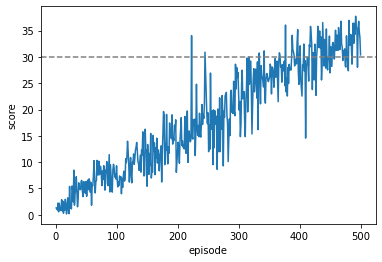

In [20]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
ax.plot(range(1,Num_episodes+1),scores_history)
ax.set_xlabel('episode')
ax.set_ylabel('score')
ax.axhline(30,color='0.5',ls='--')
plt.show()